In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/archive.zip, /content/drive/MyDrive/archive.zip.zip or /content/drive/MyDrive/archive.zip.ZIP.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import keras

from tensorflow.keras.utils import img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
# EDA
os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [ ]:
# Preprocessing
train = train_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=32)

val = val_datagen.flow_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=32)

FileNotFoundError: ignored

In [ ]:
t_img, label = train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


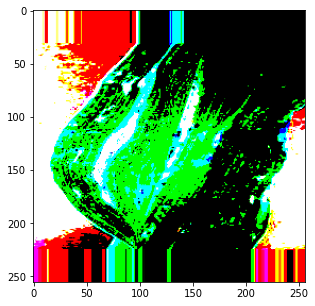

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


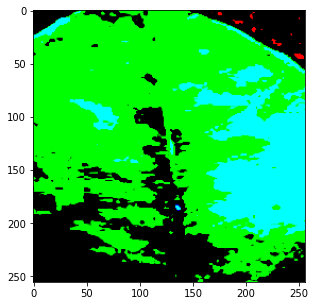

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


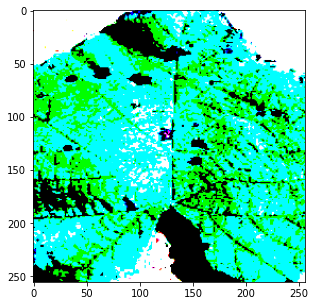

In [ ]:
plotImage(t_img[:3],label[:3])

**Model Building**

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X  = Flatten()(base_model.output)

X = Dense(units=38, activation='softmax')(X)

# Creating Final Model
model = Model(base_model.input,X)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

**Early Stopping and Model Check Point**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta=0.01, patience=3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5",monitor= 'val_accuracy', min_delta=0.01, patience=3, verbose=1, save_best_only=True)

cb = [es, mc]

In [ ]:
his = model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb, validation_data= val, validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 26.2839 - accuracy: 0.2070
Epoch 00001: val_accuracy improved from -inf to 0.39453, saving model to best_model.h5
16/16 [==============================] - 39s 1s/step - loss: 26.2839 - accuracy: 0.2070 - val_loss: 16.7873 - val_accuracy: 0.3945
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 15.3722 - accuracy: 0.4199
Epoch 00002: val_accuracy improved from 0.39453 to 0.58594, saving model to best_model.h5
16/16 [==============================] - 17s 1s/step - loss: 15.3722 - accuracy: 0.4199 - val_loss: 9.4505 - val_accuracy: 0.5859
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.7445 - accuracy: 0.5156
Epoch 00003: val_accuracy improved from 0.58594 to 0.66992, saving model to best_model.h5
16/16 [==============================] - 17s 1s/step - loss: 11.7445 - accuracy: 0.5156 - val_loss: 8.0742 - val_accuracy: 0.6699
Epoch 4/50
16/16 [==============================] - ETA: 

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

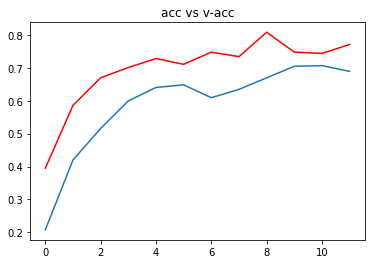

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

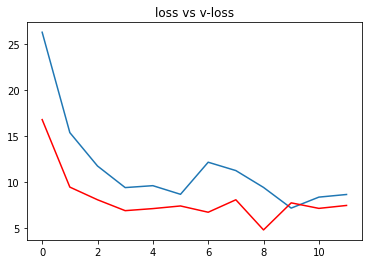

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# Load Best Model

from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]


print(f"The accuracy of your model is {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is 77.37309336662292 %


In [ ]:
ref =  dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):

  img = load_img(path, target_size=(256,256))

  i = img_to_array(img)

  im = preprocess_input(i)

  print(im)
  print(im.shape)

  img = np.expand_dims(im, axis= 0)

  print(img.shape)

  pred = np.argmax(model.predict(img))

  print(pred)

  print(f"The Test Image belongs to { ref [pred] }")

In [ ]:
path = "/content/test/test/CornCommonRust1.JPG"

prediction(path)

[[[-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  ...
  [-102.939    -113.779    -119.68    ]
  [-103.939    -113.779    -119.68    ]
  [-103.939    -114.779    -117.68    ]]

 [[-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  ...
  [-102.939    -113.779    -119.68    ]
  [-103.939    -113.779    -119.68    ]
  [-103.939    -114.779    -117.68    ]]

 [[-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  ...
  [-102.939    -113.779    -119.68    ]
  [-103.939    -113.779    -119.68    ]
  [-103.939    -113.779    -119.68    ]]

 ...

 [[ -76.939     -49.779     -51.68    ]
  [ -67.939     -39.779     -43.68    ]
  [ -63.939003  -35.779     -40.68    ]
  ...
  [-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]
  [-100.939    -113.779    -120.68    ]]

 [

In [ ]:
import